# Data Exploration Analysis of the Pokémon Dataset

## 1. Introduction

In this notebook, we perform an **exploratory data analysis** of a Pokémon dataset. The dataset consists of **images of Pokémon**, each identified by an ID (corresponding to an image file with png extension) and a label indicating its **type**.

 Objectives:
1. **Understand the dataset structure** – Check the number of images and their size (inputs), Pokémon types (outputs), and the overall data quality.
2. **Identify class distribution** – Analyze the frequency of each Pokémon type and detect potential **class imbalances**.
3. **Visualize the data** – Use representations to gain insights into the dataset (find the best one).
4. **Quantify class imbalances** – Provide precise **percentages** for each class to meet the highest evaluation criteria.

Why is this part important?
It will help us:
- detect **missing values**;
- identify **imbalances** that might's affect the model's performance;
- make decision about some **pre-processing** or other strategies.

## 2. Importation of librairies and data

**A. Librairies**

In [1]:
#basic ones
import numpy as np
import pandas as pd
import random

#graph representation
import matplotlib.pyplot as plt
import seaborn as sns

#image printing
import matplotlib.image as mpimg
import os
from PIL import Image

**B. Data**

**Put the right path here, being your google drive for colab or your local one.**

In [ ]:
# # Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# my_path = '/content/drive/MyDrive/AP_Assignement1_Task3/'


# # Local
my_path = '../data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# How to find the correct path on Google Drive ?
# First mount your drive and it might asks you to connect
# from google.colab import drive
# drive.mount('/content/drive')

# then naviguate throught your folders to find the correct one using :
# ! ls

In [ ]:
#loading the data
data = pd.read_csv(my_path + 'train_labels_task3.csv')
data.head()

,Id,label
0,6702e55d-8172-492a-8f87-a3da277b53a7,Water
1,f93ea8ca-a4ad-475a-9c2a-12baaace2992,Water
2,be649239-3880-4369-846d-8030b182d18e,Water
3,cc812e42-37e1-40c5-a49f-60eafd030943,Water
4,e2af2db9-2978-4274-824a-13cb62b8c08c,Water


**C. Images**

In [5]:
#linking the data to the images
images_names = data['Id']+'.png'
data['images'] = images_names
data.head()


,Id,label,images
0,6702e55d-8172-492a-8f87-a3da277b53a7,Water,6702e55d-8172-492a-8f87-a3da277b53a7.png
1,f93ea8ca-a4ad-475a-9c2a-12baaace2992,Water,f93ea8ca-a4ad-475a-9c2a-12baaace2992.png
2,be649239-3880-4369-846d-8030b182d18e,Water,be649239-3880-4369-846d-8030b182d18e.png
3,cc812e42-37e1-40c5-a49f-60eafd030943,Water,cc812e42-37e1-40c5-a49f-60eafd030943.png
4,e2af2db9-2978-4274-824a-13cb62b8c08c,Water,e2af2db9-2978-4274-824a-13cb62b8c08c.png


## 3. Global Descriptive Statistics

**A. Basic figures**

In [6]:
#counting the number of images (inputs)
print("Number of images: ")
int(data["Id"].count())

Number of images: 


1194

In [7]:
#counting the number of labels (output classes)
print("Number of labels: ")
data["label"].nunique()

Number of labels: 


9

In [8]:
#listing the labels and their counts
print("Labels and their counts: ")
data["label"].value_counts()

Labels and their counts: 


,count
label,
Water,252
Normal,222
Grass,159
Bug,150
Fire,114
Rock,99
Ground,72
Poison,66
Fighting,60


In [9]:
#duplicates in the data
print("Number of duplicates: ")
int(data.duplicated().sum())

Number of duplicates: 


0

Indeed, this dataset does not contain any duplicate data.

**B. Visualization of class distribution**

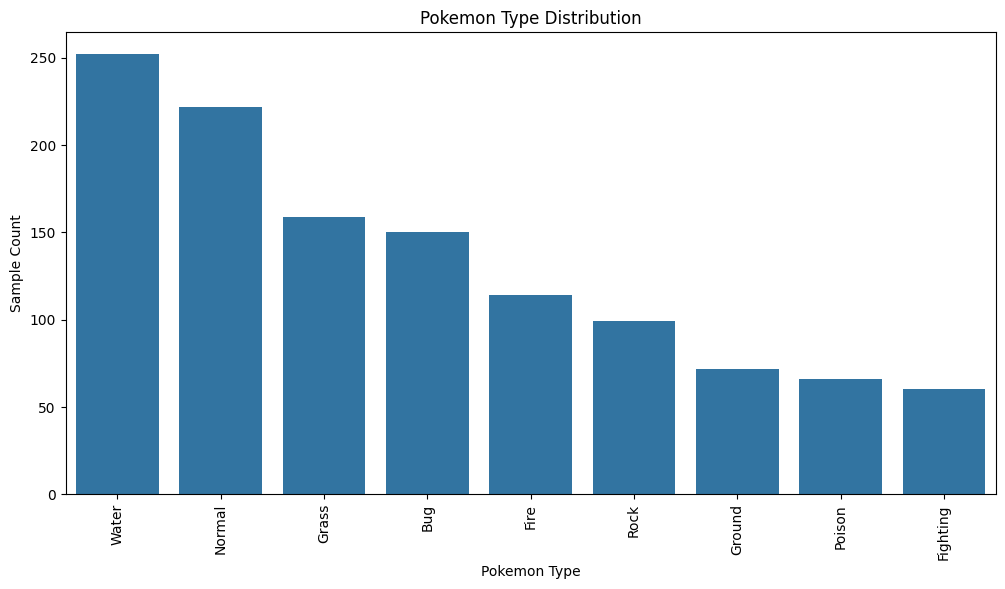

In [10]:
#visualizing the labels with an histogram
type_counts = data['label'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Pokemon Type')
plt.ylabel('Sample Count')
plt.title('Pokemon Type Distribution')
plt.show()


Is this histogram the best way to visualize the data? Maybe we can try with a pie chart.

**C. Percentage representation of each class to assess class imbalances**

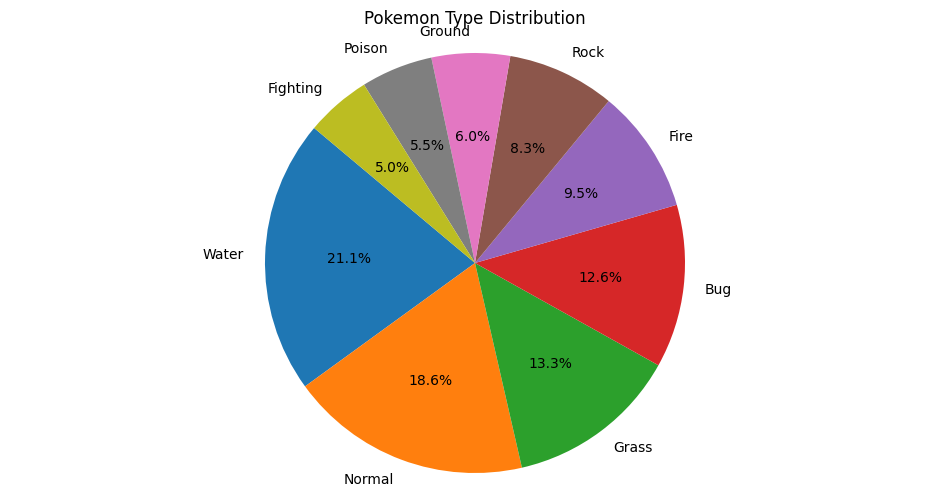

In [11]:
#visualizing the labels with a pie chart
plt.figure(figsize=(12, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pokemon Type Distribution')
plt.show()

We can notice that the data is **imbalanced**. We will have to balance it before using it in our model.
Now that we have information about the **data**, we can look up for information about the **images**.

## 4. Analysing the images

In [ ]:
#check if all the images have the same size
image_sizes = []
for image in data['images']:
    image_sizes.append(Image.open(my_path + "Train_task3/" + image).size)
image_sizes = np.array(image_sizes)
unique_sizes = np.unique(image_sizes, axis=0)
print(f"Number of different size of images: {len(unique_sizes)}")

#image sizes
image = Image.open(my_path +"Train_task3/"+image)
print(f"Size of the image {id}: {image.size} pixels")

KeyboardInterrupt: 

All the images have the same size **400*300 pixels**. Thanks to that, we can assume that there is **not any outliers**.

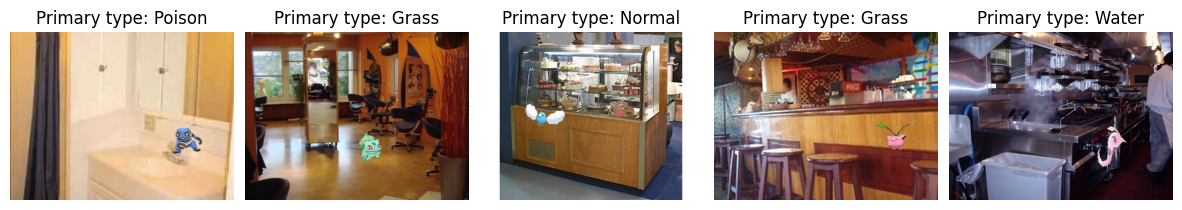

In [ ]:
#select 5 random images  and display them with their primary type
random_indices = random.sample(range(len(data)), 5)

fig, axs = plt.subplots(1, 5, figsize=(15, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.05)
axs = axs.ravel()

for i, idx in enumerate(random_indices):
    img = mpimg.imread(os.path.join(my_path + 'Train_task3', data['images'][idx]))
    axs[i].imshow(img)
    axs[i].set_title("Primary type: " + data['label'][idx])
    axs[i].axis('off')

plt.show()

## 6. Summary and Conclusion

**Key Findings:**

- The dataset contains **1194** Pokémon images, each labeled with one of **9** different types.
- The class distribution analysis shows that:
  - The most frequent Pokémon type is **the Water type**, representing **21.1%** of the dataset.
  - The least frequent type is **the Fighting type**, with only **5.0%** of the data.
  - These figures indicate a potential **class imbalance** that must be fixed.
- **Visualization of images** confirmed the **quality and consistency** of the dataset: we have now more complex images with more complex background and it is difficult to make the difference with the pokemon.

**Problem Identified:**

- **Class imbalance**: Some Pokémon types are underrepresented, which could lead to **biased model predictions**.
- **Data balancing needed**: To improve model generalization, techniques like **oversampling, undersampling, or synthetic data generation** may be required before gicing the data to our MLP.